## importing libraries

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
from matplotlib import style
style.use("default")

## Dividing dataset into training, validation and testing

In [2]:
#rb = read binary #wb = write binary #.p extension = pickle extension
with open("./data/train.p", mode = "rb") as training_data:
    train = pickle.load(training_data)
with open("./data/valid.p", mode = "rb") as validation_data:
    valid = pickle.load(validation_data)
with open("./data/test.p", mode = "rb") as testing_data:
    test = pickle.load(testing_data)

NameError: name 'pickle' is not defined

#### Why we need validation data?
- used for cross-validation which is performed to asses training quality as training proceeds
- cross-validation is used to overcome over-fitting which occurs when algorithm focuses on training set details at cost of losing generalization ability

In [4]:
# display the types
print("Type of the train data: ", type(train))

Type of the train data:  <class 'dict'>


In [5]:
# display the keys
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [6]:
X_train, y_train = train["features"], train["labels"]

In [7]:
print(X_train.shape, y_train.shape)
# 34799 images, 32*32 pixels, color = 3

(34799, 32, 32, 3) (34799,)


In [39]:
X_train[0].shape

(32, 32, 3)

In [8]:
X_valid, y_valid = valid["features"], valid["labels"]
X_test, y_test = test["features"], test["labels"]
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(4410, 32, 32, 3) (4410,)
(12630, 32, 32, 3) (12630,)


In [9]:
# perscentage of data
total = len(y_train) + len(y_test) + len(y_valid)
print(f"totla data: {total}")
print(f"train data: {(len(y_train)/total)*100:0.2f}%")
print(f"test data: {(len(y_test)/total)*100:0.2f}%")
print(f"valid data: {(len(y_valid)/total)*100:0.2f}%")

totla data: 51839
train data: 67.13%
test data: 24.36%
valid data: 8.51%


## Perform image visualization

In [10]:
sign_labels = {0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)",
     3: "Speed limit (60km/h)", 4: "Speed limit (70km/h)", 5: "Speed limit (30km/h)",
     6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)", 8: "Speed limit (120km/h)",
     9: "No passing", 10: "No passing for vehicles over 3.5 metric tons",
     11: "Right-of-way at the next intersection", 12: "Priority road", 13: "Yield", 14: "Stop",
     15: "No vehicles", 16: "Vehicles over 3.5 metric tons prohibited", 17: "No entry",
     18: "General caution", 19: "Dangerous curve to the left", 20: "Dangerous curve to the right",
     21: "Double curve", 22: "Bumpy road", 23: "Slippery road", 24: "Road narrows on the right",
     25: "Road work", 26: "Traffic signals", 27: "Pedestrians", 28: "Children crossing",
     29: "Bicycle crossing", 30: "Beware of ice/snow", 31: "Wild animals crossing",
     32: "End of all speed and passing limits", 33: "Turn right ahead", 34: "Turn left ahead",
     35: "Ahead only", 36: "Go straight or right", 37: "Go straight or left", 38: "Keep right",
     39: "Keep left", 40: "Roundabout mandatory", 41: "End of no passing",
     42: "End of no passing by vehicles over 3.5 metric tons"}

Wild animals crossing


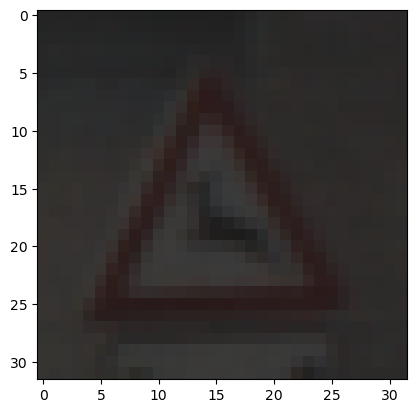

In [11]:
# taking random number beween 1 and length of X_train(34799)
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i]) 
print(sign_labels[y_train[i]])

#### Extra: Let's see subplot

Figure(640x480) [[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CF2F70C48>


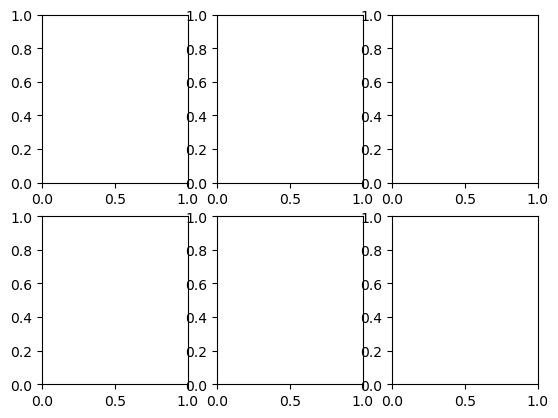

In [12]:
fig, ax = plt.subplots(2, 3)
print(fig, ax)

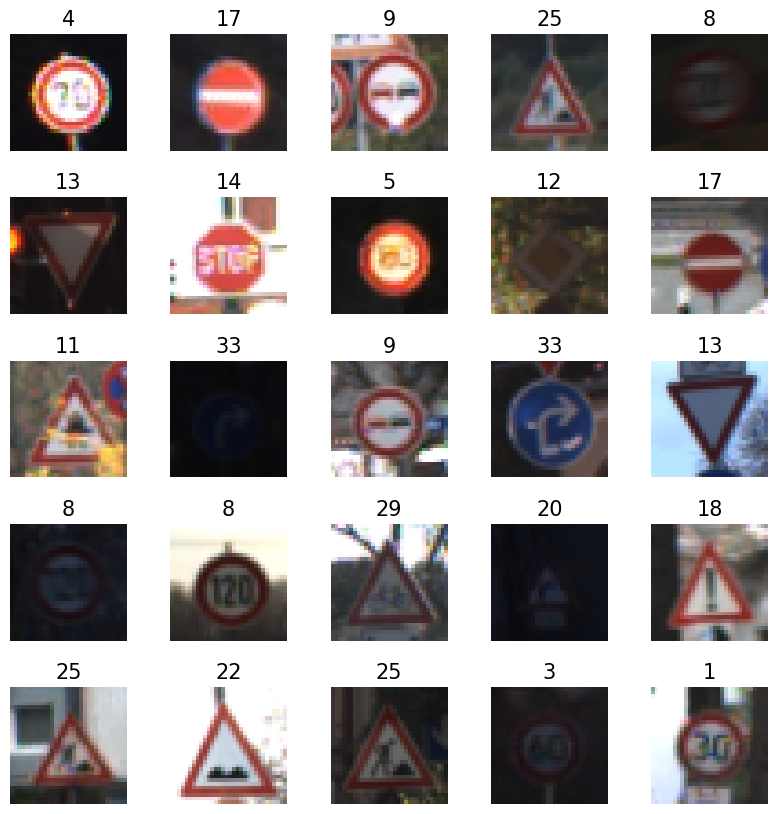

In [66]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

# subplots gives 2D array. We need to convert it into 1D array
axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace = 0.4)

##### Let's see what is ravel()

In [14]:
arr_2d = np.array([[0, 1, 2],
                   [3, 4, 5],
                   [6, 7, 8]])

flat_array = np.ravel(arr_2d)
print("Flattened view: ", flat_array)

Flattened view:  [0 1 2 3 4 5 6 7 8]


## TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [15]:
# we're just shuffling the images because we're not letting the machine to learn the order of the items
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

In [16]:
# The keepdims parameter enables you to keep the number of dimensions of the output the same as the input.
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

In [17]:
# check what happens if we don't provide keepdims attribute
X_valid_gray_test = np.sum(X_valid/3, axis=3)
X_valid_gray_test.shape

(4410, 32, 32)

In [18]:
print(X_train.ndim)
print(X_train.shape)
print(X_train_gray.shape)

4
(34799, 32, 32, 3)
(34799, 32, 32, 1)


In [19]:
X_train_gray_norm = (X_train_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

In [54]:
X_train_gray_norm

array([[[[-0.68489583],
         [-0.6953125 ],
         [-0.72395833],
         ...,
         [-0.75260417],
         [-0.65885417],
         [-0.453125  ]],

        [[-0.6953125 ],
         [-0.703125  ],
         [-0.73697917],
         ...,
         [-0.73697917],
         [-0.63020833],
         [-0.5625    ]],

        [[-0.70052083],
         [-0.7109375 ],
         [-0.72916667],
         ...,
         [-0.72916667],
         [-0.6875    ],
         [-0.66666667]],

        ...,

        [[-0.70833333],
         [-0.71875   ],
         [-0.6953125 ],
         ...,
         [-0.81510417],
         [-0.80989583],
         [-0.76822917]],

        [[-0.73177083],
         [-0.73958333],
         [-0.7421875 ],
         ...,
         [-0.82291667],
         [-0.82291667],
         [-0.76822917]],

        [[-0.73958333],
         [-0.7421875 ],
         [-0.74739583],
         ...,
         [-0.8203125 ],
         [-0.8203125 ],
         [-0.79947917]]],


       [[[-0.80989583],


In [57]:
a = X_train_gray.squeeze()
X_train_gray.shape, a.shape

((34799, 32, 32, 1), (34799, 32, 32))

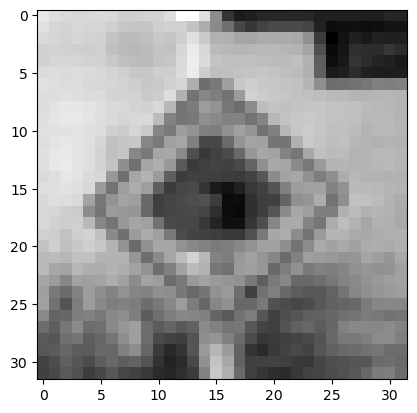

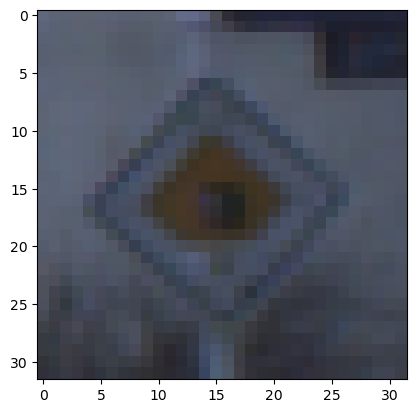

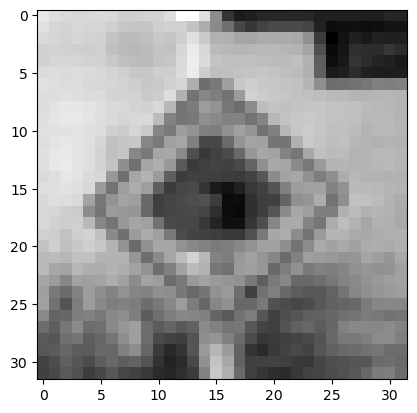

In [20]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

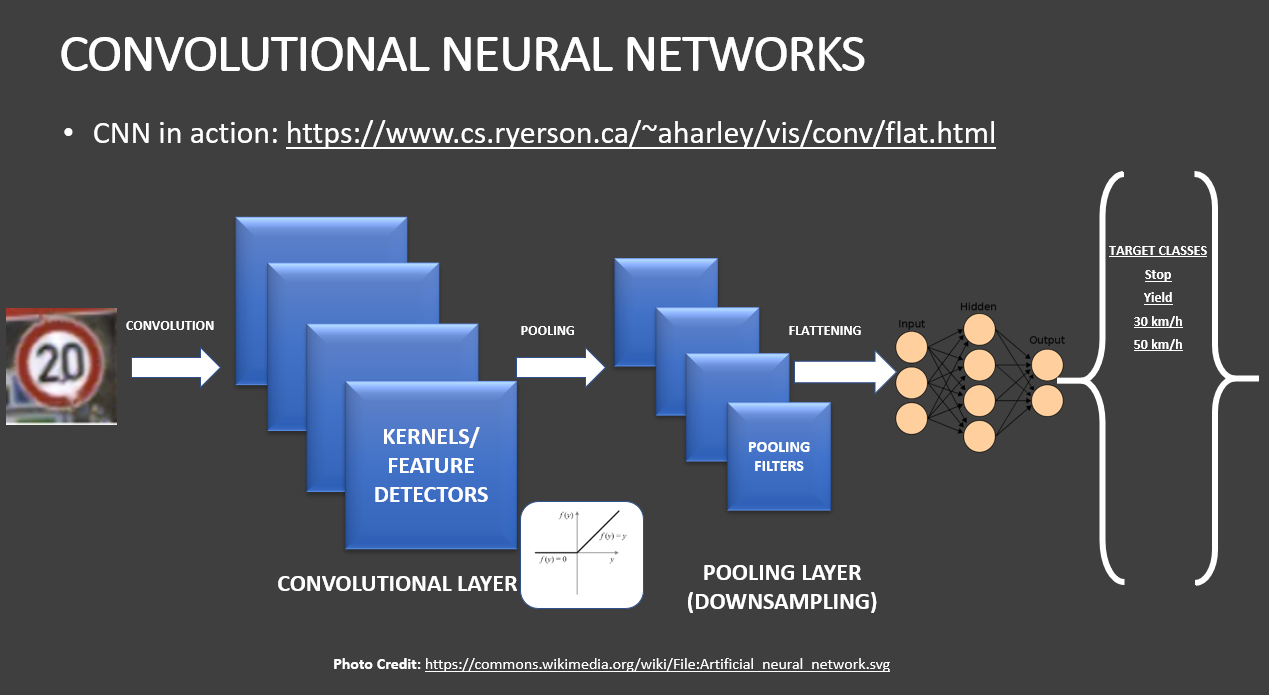

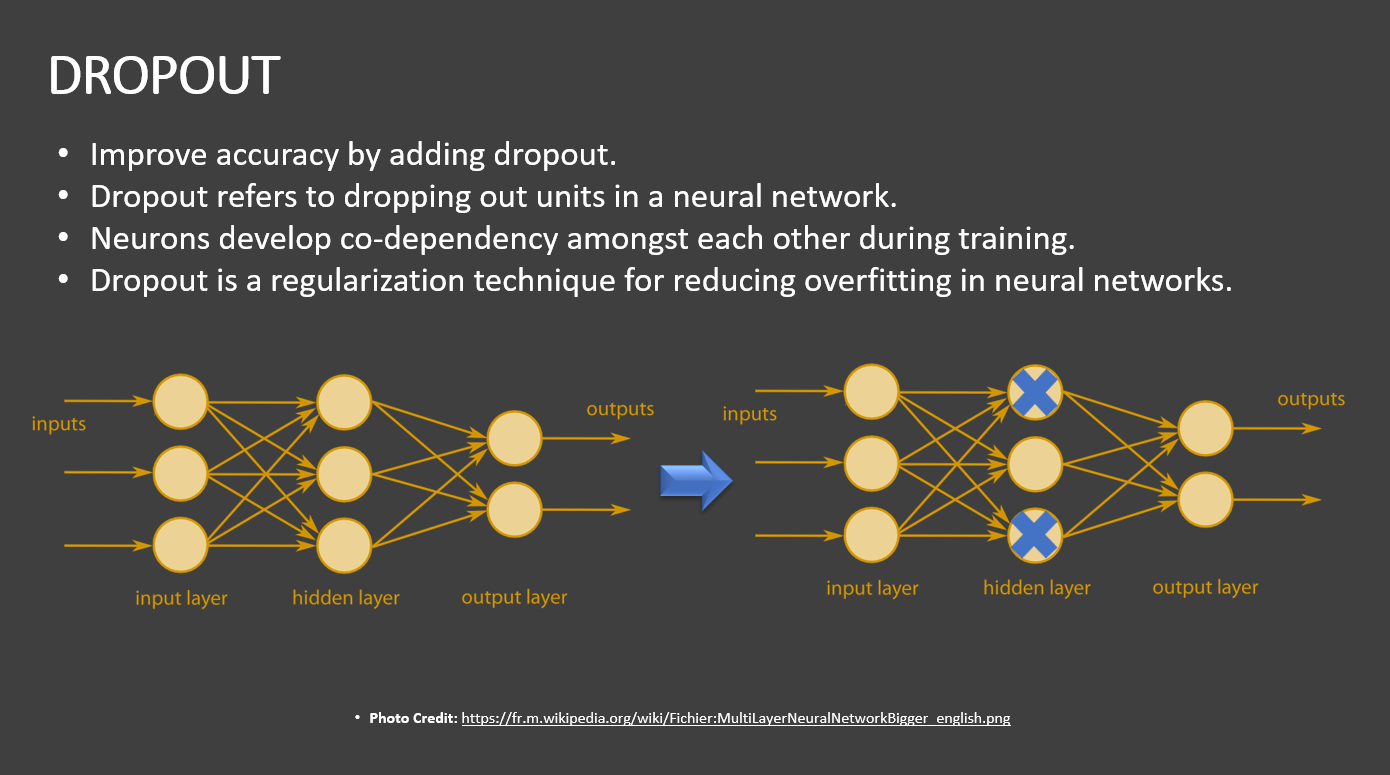

In [21]:
from tensorflow.keras import datasets, models, layers

In [22]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation = "relu", input_shape = (32, 32, 1)),
    layers.AveragePooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(16, (5, 5), activation = "relu"),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(120, activation = "relu"),
    layers.Dense(84, activation = "relu"),
    layers.Dense(43, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

## TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [23]:
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

#### By setting *verbose* 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

**verbose = 0** will show you nothing (silent)

**verbose = 1** will show you an animated progress bar like this:

=============================================

**verbose=2** will just mention the number of epoch like this: 1/10


In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [25]:
callbacks = myCallback()
history = model.fit(X_train_gray_norm, y_train,
                   batch_size = 500,
                   epochs = 30,
                   verbose = 1,
                   validation_data = (X_valid_gray_norm, y_valid),
                   callbacks = [callbacks]
                   )

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 26s 744us/sample - loss: 3.2715 - accuracy: 0.1550 - val_loss: 2.8388 - val_accuracy: 0.2712
Epoch 2/30
34799/34799 [==============================] - 21s 607us/sample - loss: 1.9012 - accuracy: 0.4759 - val_loss: 1.4683 - val_accuracy: 0.5898
Epoch 3/30
34799/34799 [==============================] - 23s 659us/sample - loss: 1.1442 - accuracy: 0.6671 - val_loss: 0.9743 - val_accuracy: 0.7023
Epoch 4/30
34799/34799 [==============================] - 22s 638us/sample - loss: 0.8374 - accuracy: 0.7575 - val_loss: 0.7967 - val_accuracy: 0.7728
Epoch 5/30
34799/34799 [==============================] - 22s 637us/sample - loss: 0.6740 - accuracy: 0.8058 - val_loss: 0.6930 - val_accuracy: 0.7993
Epoch 6/30
34799/34799 [==============================] - 24s 677us/sample - loss: 0.5725 - accuracy: 0.8370 - val_loss: 0.6258 - val_accuracy: 0.8295
Epoch 7/30
34799/34799 [=====================

In [28]:
# save the model
models.save_model(model, "traffic_sign.hdf5")

## TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE

In [19]:
test_loss, test_acc = model.evaluate(X_test_gray_norm, y_test)
print(test_loss, test_acc)

12630/12630 [==============================] - 4s 330us/sample - loss: 0.6647 - accuracy: 0.8680
0.6647092252427024 0.86801267


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

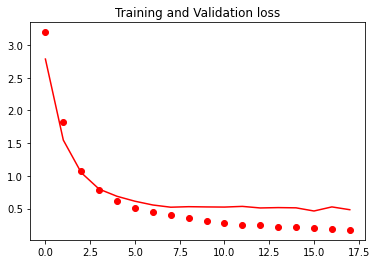

In [26]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, "ro", label = "Training loss")
plt.plot(epochs, val_loss, "r", label = "Validation loss")
plt.title("Training and Validation loss")

Text(0.5, 1.0, 'Training and Validation accuracy')

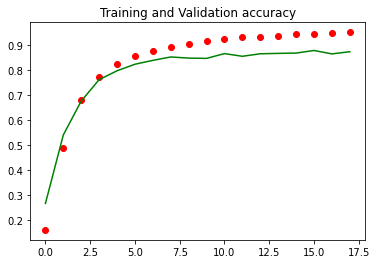

In [28]:
plt.plot(epochs, accuracy, "ro", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "g", label = "Validation accuracy")
plt.title("Training and Validation accuracy")

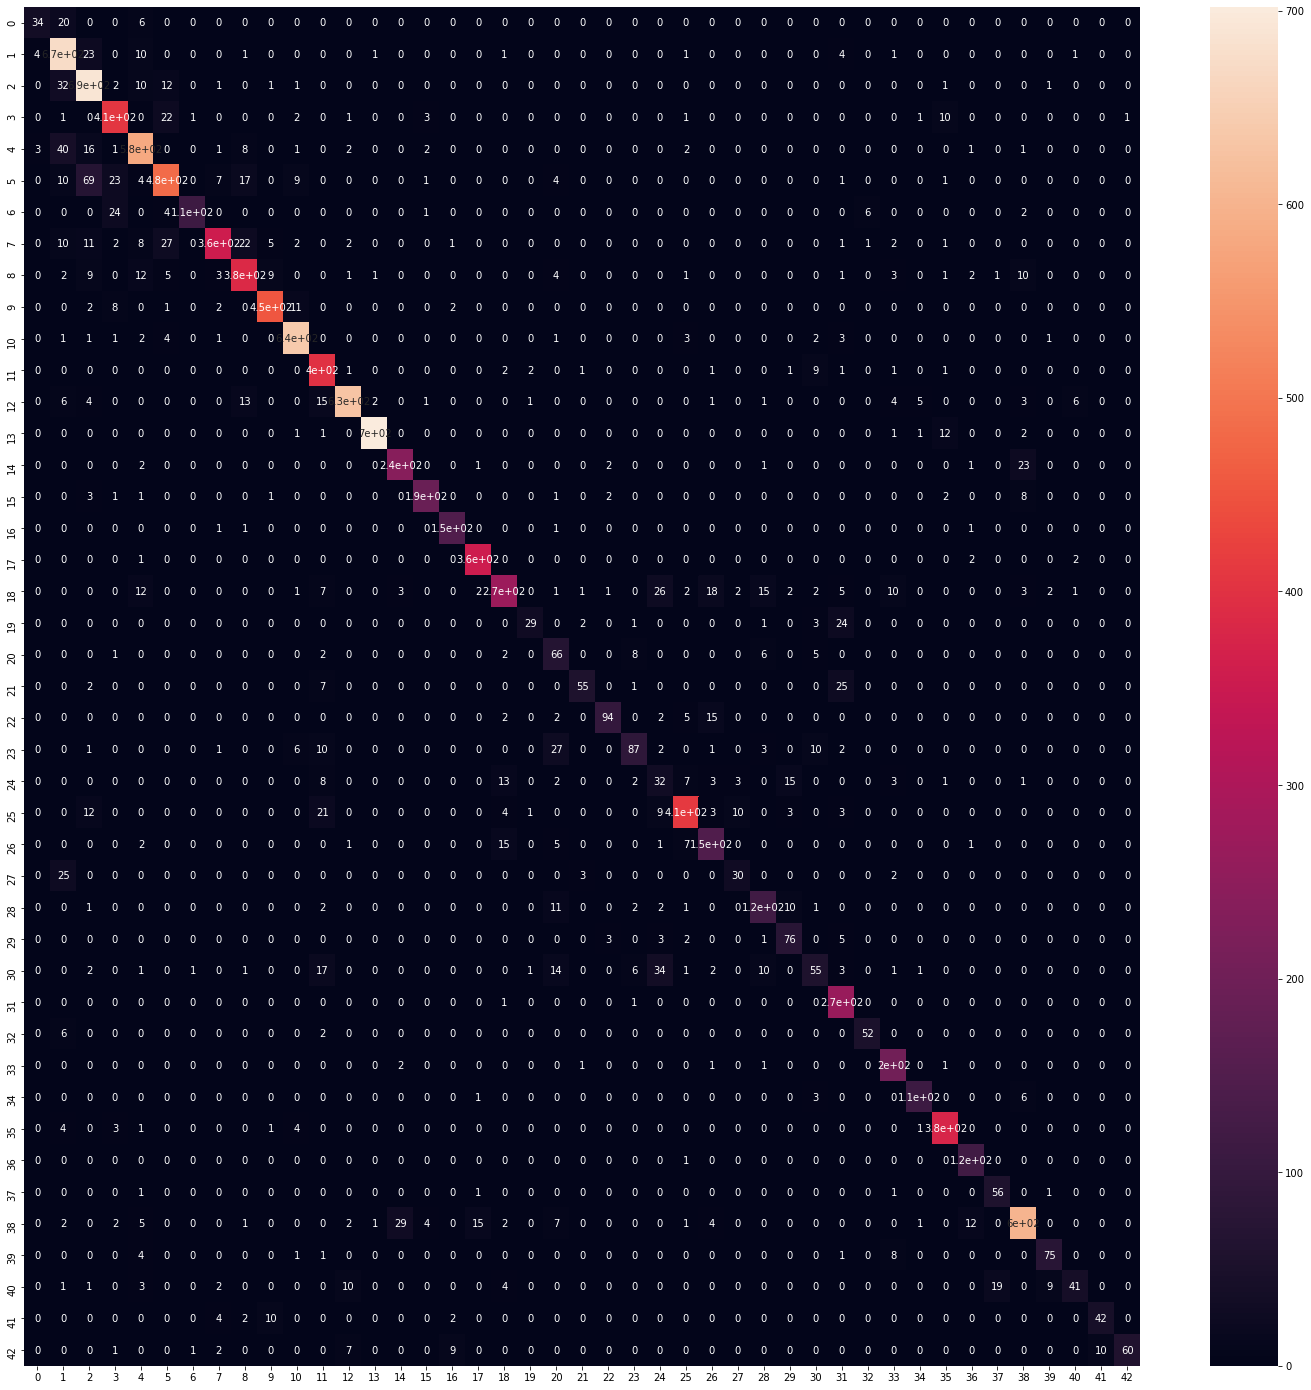

In [29]:
predicted_classes = model.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

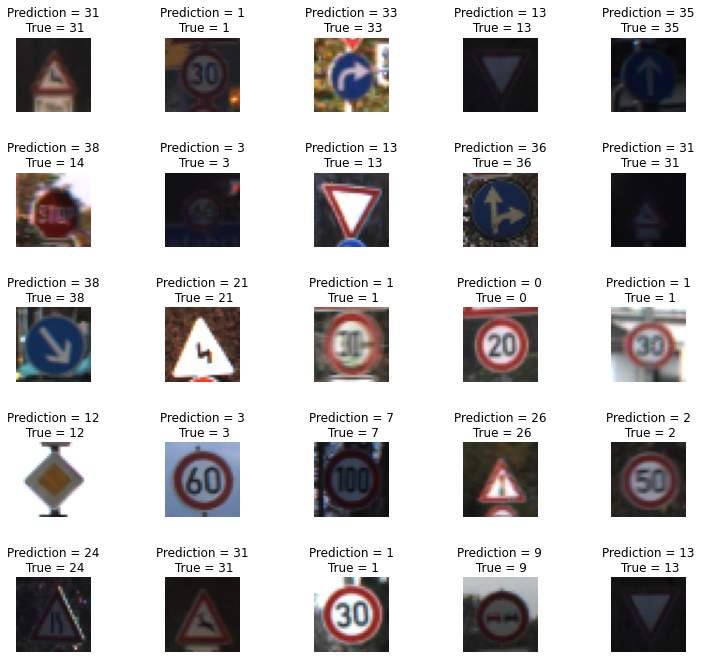

In [32]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

### Appendix
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

In [29]:
my_model = models.load_model("traffic_sign.hdf5")

In [30]:
type(my_model)

tensorflow.python.keras.engine.sequential.Sequential

In [35]:
import cv2

In [67]:
cap = cv2.imread("./traffic-signs-data/stop2.jpeg")

In [55]:
cap.shape

(1024, 805, 3)

In [68]:
resize_cap = cv2.resize(cap, (32, 32))
resize_cap.shape

(32, 32, 3)

In [69]:
# cap_gray = cv2.cvtColor(resize_cap, cv2.COLOR_BGR2GRAY, keep)
gray_cap = np.sum(resize_cap/3, axis=2, keepdims=True)
gray_cap.shape

(32, 32, 1)

In [70]:
norm_cap = (gray_cap - 128)/128
norm_cap.shape

(32, 32, 1)

In [71]:
reshaped_norm_cap = np.array([norm_cap])
reshaped_norm_cap.shape

(1, 32, 32, 1)

In [75]:
prediction = model.predict_classes(reshaped_norm_cap)

In [76]:
prediction

array([14], dtype=int64)

In [79]:
int(prediction)

14

In [80]:
sign_labels[int(prediction)]

'Stop'

In [87]:
def show_classes():
    li = []
    for key in sign_labels:
        li.append(str(key) + ": " + sign_labels[key])
    
    return li

print(show_classes())

['0: Speed limit (20km/h)', '1: Speed limit (30km/h)', '2: Speed limit (50km/h)', '3: Speed limit (60km/h)', '4: Speed limit (70km/h)', '5: Speed limit (30km/h)', '6: End of speed limit (80km/h)', '7: Speed limit (100km/h)', '8: Speed limit (120km/h)', '9: No passing', '10: No passing for vehicles over 3.5 metric tons', '11: Right-of-way at the next intersection', '12: Priority road', '13: Yield', '14: Stop', '15: No vehicles', '16: Vehicles over 3.5 metric tons prohibited', '17: No entry', '18: General caution', '19: Dangerous curve to the left', '20: Dangerous curve to the right', '21: Double curve', '22: Bumpy road', '23: Slippery road', '24: Road narrows on the right', '25: Road work', '26: Traffic signals', '27: Pedestrians', '28: Children crossing', '29: Bicycle crossing', '30: Beware of ice/snow', '31: Wild animals crossing', '32: End of all speed and passing limits', '33: Turn right ahead', '34: Turn left ahead', '35: Ahead only', '36: Go straight or right', '37: Go straight or